# 인공지능기초 3주차 실습(결과)

대표적인 **파이썬 데이터분석 라이브러리**인 판다스([Pandas](https://pandas.pydata.org/))를 사용한다.<br>
데이터분석에 자주 사용되는 만큼 코랩(Colab) 환경에서는 기본적으로 설치가 되어 있다.

In [ ]:
import pandas as pd

실습에 사용되는 데이터파일인 [housing.csv](https://github.com/ageron/data/blob/main/housing/housing.csv)은 1990년대 조사된 **캘리포니아 주택 가격** 데이터셋이다.<br>
<code>Pandas</code>에서 <code>csv</code>파일(Comman-Separated Values)을 읽는 <code>read_csv()</code>파일은 온라인 상의 주소(url)을 바로 읽을 수 있다.

In [ ]:
data_path = "https://raw.githubusercontent.com/ageron/data/refs/heads/main/housing/housing.csv"
df = pd.read_csv(data_path)

<code>Pandas</code>의 기본 자료구조는 <code>DataFrame</code>이다.

In [ ]:
type(df)

pandas.core.frame.DataFrame

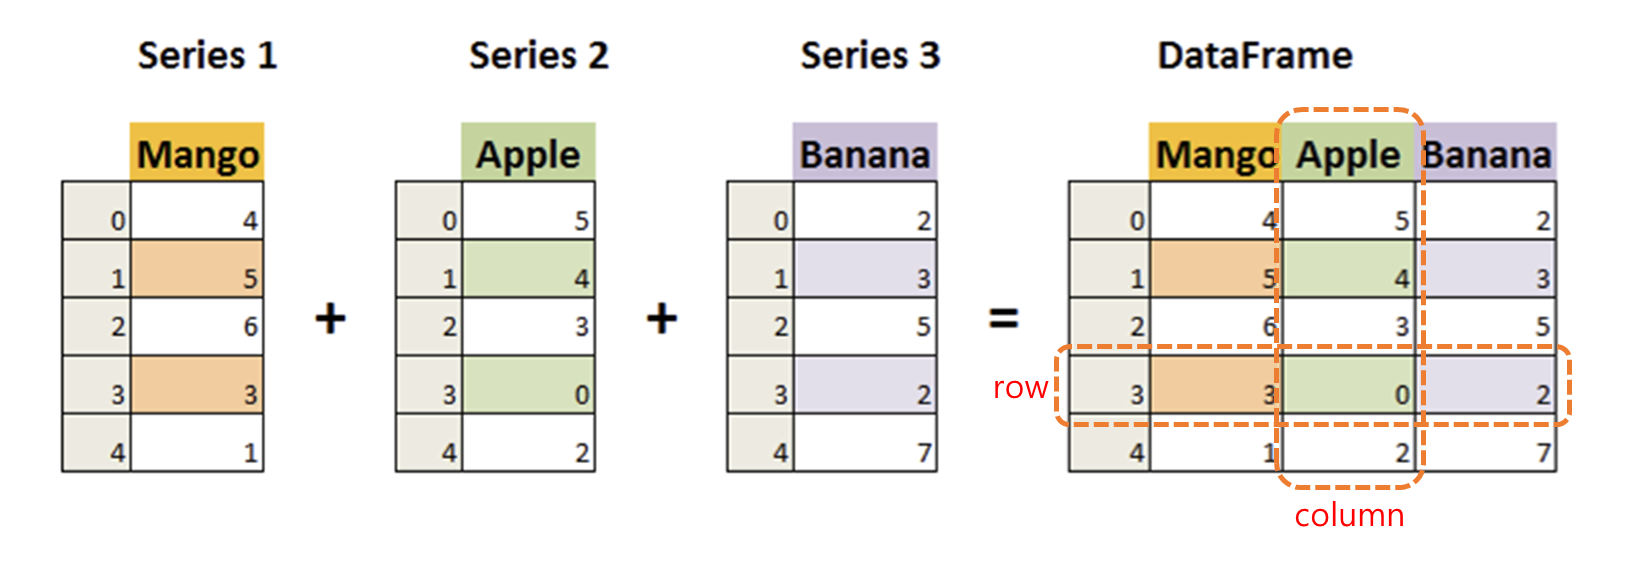

순차적으로 데이터를 저장하는 1차원 배열인 <code>Series</code>가 결합된 형태의 <code>DataFrame</code>는 **행(row)**과 **열(Column)**로 이뤄진 테이블 형태의 2차원 데이터 구조다.

## 단계 1. 데이터 구조 훑어보기

### 1-1. 데이터프레임의 처음 몇 개의 행을 살펴보는 <code>head()</code>

<code>head()</code> 함수는 데이터프레임(DataFrame)의 처음 몇 개를 반환하는 함수다.<br>
<code>head()</code> 안에 숫자를 적어주면 그 수만큼의 행을 출력할 수 있고, 기본값은 5개다.

In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


처음 3개의 항만 확인하고 싶을 때는 <code>n=3</code>를 입력할 수 있다.

In [ ]:
df.head(n=3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY


비슷한 방식으로 DataFrame객체의 끝에 있는 데이터 몇개를 확인할 때에는 <code>tail()</code>을 사용할 수 있다.

In [ ]:
df.tail(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


데이터프레임의 개수는 <code>len(df)</code>로 확인할 수 있는데, 이로부터 위의 <code>tail()</code>이 끝에 있는 데이터들을 보여줌을 확인할 수 있다.

In [ ]:
len(df)

20640

### 1-2. 데이터프레임에 대한 간단한 정보를 확인하는 <code>info()</code>

데이터에 대한 간략한 설명과 **전체 행 수**, **각 특성의 데이터 타입**, **널(null)이 아닌 값의 개수** 등을 확인할 때는 데이터프레임의 <code>info()</code>를 사용할 수 있다.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


위의 정보 중에서 <code>total_bedrooms</code> 컬럼의 <code>Not-Null</code>(Null 값이 아닌) 샘플의 개수는 20433개 임을 알 수 있다.<br>
아래와 같은 방식으로 Null값인 샘플의 개수도 계산할 수 있다.

In [ ]:
df["total_bedrooms"].isnull().sum().item()

207

<code>isnull()</code> 대신에 <code>isna()</code>도 동일한 결과를 반환한다.

In [ ]:
df["total_bedrooms"].isna().sum().item()

207

### 1-3. 컬럼에서 카테고리별로 개수를 살펴보는 <code>value_counts()</code>

수치형 데이터인 다른 특성(feature)과 달리 <code>ocean_proximity</code>는 **문자열**이다(데이터프레임에서는 <code>object</code> 타입으로 나타난다).<br>
이 때, 모든 문자열이 임의의 값이지는 않고, 특정 범주(category) 중의 하나일 것이다.<br>
<code>ocean_proximity</code>는 정성 데이터(qualitative data) 중에서 범주형 데이터다.

데이터프레임에서 특성명(또는 새로로 배열되었다는 의미에서 컬럼명)을 입력하면, 특정한 컬럼만 선택할 수 있다.<br>
이렇게 선택된 컬럼에서 <code>value_counts()</code>함수를 사용하면, 중복되지 않은 값이 몇 개 있는지 확인할 수 있다.

In [ ]:
df["ocean_proximity"].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


예상할 수 있듯이 범주형 데이터가 아닌 연속형 수치 데이터를 갖는 컬럼에서 <code>value_counts()</code>를 쓰면 의미있는 정보를 얻기는 힘들다.

In [ ]:
df["longitude"].value_counts()

,count
longitude,
-118.31,162
-118.30,160
-118.29,148
-118.27,144
-118.32,142
...,...
-114.47,1
-124.26,1
-123.13,1


개수 대신에 단순히 중복되지 않은 항목의 종류만 알고 싶을 때에는 <code>unique()</code>를 사용할 수 있다

In [ ]:
df["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

### 1-4. 수치형 특성의 요약정보를 보여주는 <code>describe()</code>

- count : 행의 개수
- mean : 수치형 특성의 평균값
- std : 수치형 특성의 표준편차
- min, max : 최소값과 최대값
- 25%, 50%, 75% : 제 1 사분위수, 중간값(median), 제 3 사분위수

In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### 1-5. 히스토그램을 그려주는 <code>hist()</code>

히스토그램(histogram)은
- 연속적인 데이터를 일정한 구간으로 나누고,
- 각 구간에 속하는 데이터의 개수를 막대의 높이로 표현한다.

히스토그램을 통하여, 연속형 데이터의 분포를 한 눈에 파악할 수 있다.

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

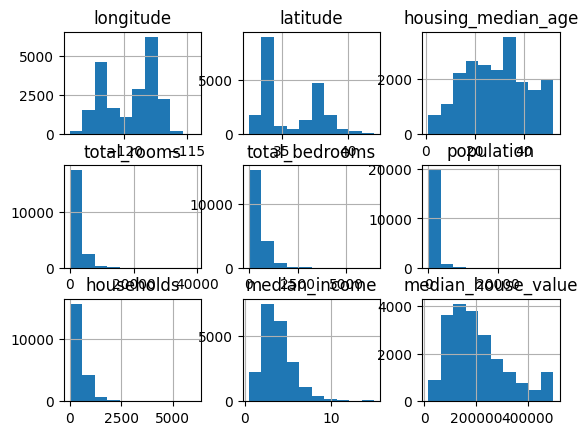

In [ ]:
df.hist()

위에서 보는 것처럼 설정값을 입력하지 않으면, 보기에 불편할 수 있다.
- bins : 히스토그램에 나타낼 구간의 수
- figsize : 히스토그램이 포함된 전체 그래프 이미지의 크기

이를 고려하여 <code>bins=50</code>, <code>figsize=(20, 15)</code>를 입력하여 히스토그램을 새로 그려본다.

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

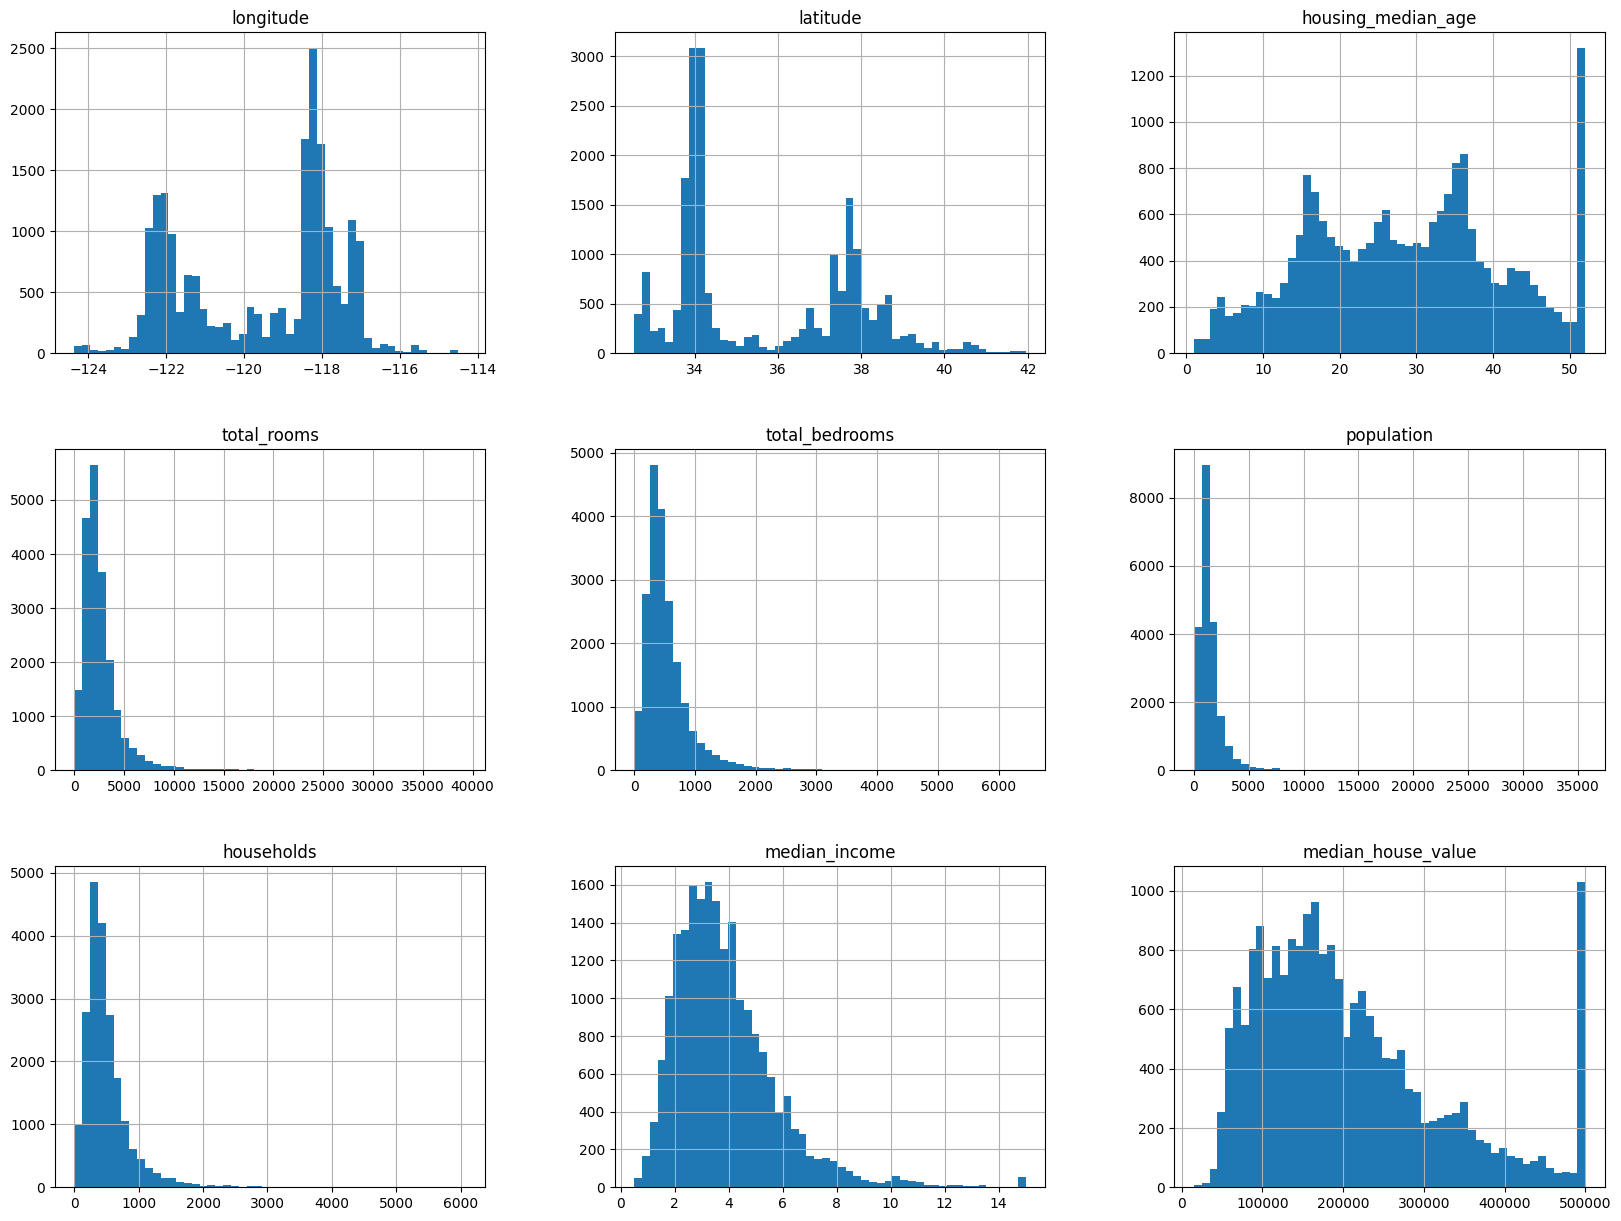

In [ ]:
df.hist(bins=50, figsize=(20, 15))

위의 히스토그램으로 판단할 수 있는 사항은 다음과 같다.

1. 중간 소득(median_income)의 X축 눈금을 보면, 단순히 달러($)단위가 아닐 수 있음을 알 수 있다.<br>
실제로는 상한값이 15, 하한값이 0.5가 되도록 스케일이 조정된 값으로 생각할 수 있다.

2. housing_median_age와 median_house_value의 히스토그램에서 가장 오른쪽 구간의 값이 치솟는 것을 알 수 있다.<br>
이는 해당 속성(=컬럼)의 최댓값을 한정해서 나타나는 현상으로, 그대로 학습하게 되면, 최댓값 이상으로는 값을 예상할 수 없도록 학습될 것이다.
    
    a. 따라서 최댓값을 없애고 정확한 레이블을 복원한 다음에 훈련을 시키거나
    
    b. 훈련데이터셋에서 최댓값 이상의 값을 제거한다.

3. 각 속성마다 범위와 히스토그램의 모양이 큰 차이를 보인다. 즉, 특성들의 스케일이 많이 다르거나 데이터의 분포가 편향된 상태로 생각할 수 있다.

## 단계 2. 테스트셋 만들기(=데이터셋의 분할)

과대적합(overfitting)을 막고, 올바른 일반화 오차(generalization error)를 얻으려면, 전체 데이터셋을 분할하는 것이 필요하다.<br>
실제로는 **훈련데이터셋**과 **테스트 데이터셋** 이외에 후보모델 중 최고 성능 모델을 선택하기 위한 **검증 데이터셋**이 있으면 좋지만, 여기에서는 단순히 훈련-테스트 셋으로만 나누도록 한다.

### 단계 2-1. 무작위 샘플링으로 데이터셋 분할

scikit-learn의 <code>train_test_split</code>을 사용하면, 원하는 비율만큼 테스트셋을 분할할 수 있다.<br>
- test_size : 테스트셋 분할 비율
- random_state : 초기 난수값 - 고정함으로써 계속 동일하게 분할 가능

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_set, test_set = train_test_split(df, test_size = 0.2, random_state=42)

In [ ]:
print(f"데이터셋의 총 레코드수: {len(df)}")
print(f"훈련셋의 레코드 수 : {len(train_set)}, 훈련셋의 비율 : {len(train_set)/len(df):.4f}")
print(f"테스트셋의 레코드 수: {len(test_set)}, 테스트셋의 비율: {len(test_set)/len(df):.4f}")

데이터셋의 총 레코드수: 20640
훈련셋의 레코드 수 : 16512, 훈련셋의 비율 : 0.8000
테스트셋의 레코드 수: 4128, 테스트셋의 비율: 0.2000


### 단계 2-2. 계층적 샘플링을 통한 데이터셋 분할

가장 간단한 방식의 데이터셋 분할인 <code>train_test_split</code>은 **무작위 샘플링** 이기 때문에, 때때로 **특정 속성**에서 훈련 데이터와 테스트 데이터의 분포 비율이 다르게 나타나는 **샘플링 편향** 또는 **샘플링 잡음**이 생길 수 있다.

중위 소득을 의미하는 <code>median_income</code> 컬럼의 분포를 알아보기 위하여 히스토그램을 그려본다.

<Axes: >

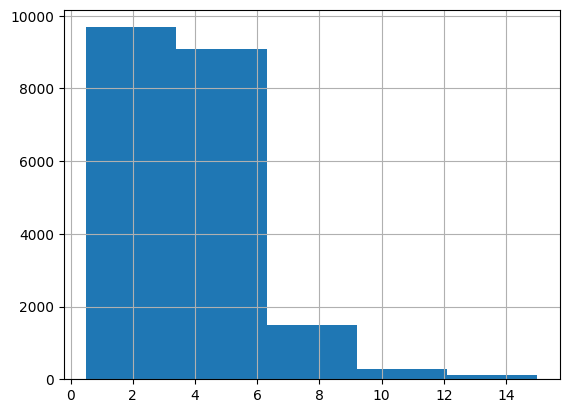

In [ ]:
df["median_income"].hist(bins = 5)

중위 소득을 연속된 값 대신에 다섯개의 구간으로 나누고, 각각에 독립적인 레이블을 부여한다.<br>
<code>pandas.cut()</code>함수를 이용하여, 히스토그램을 그리듯이 **연속형 데이터**를 구간(bin)으로 나눠 **범주형 데이터**로 변환할 수 있다.

In [ ]:
import numpy as np
df["income_category"] = pd.cut(df["median_income"],
                               bins=[0.0, 1.5, 3.0, 4.5, 6., np.inf ],
                               labels = [1, 2, 3, 4, 5])

분할된 결과는 다음과 같다.

In [ ]:
df["income_category"].value_counts()

,count
income_category,
3,7236
2,6581
4,3639
5,2362
1,822


<Axes: >

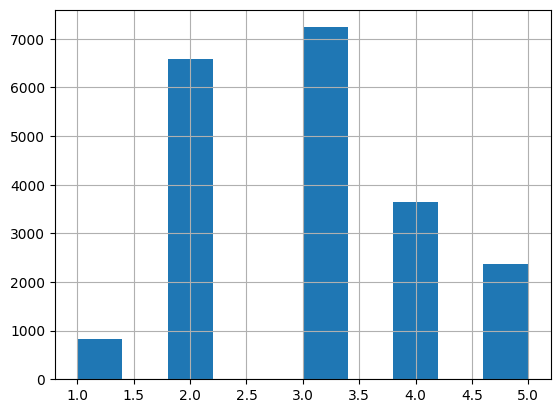

In [ ]:
df["income_category"].hist()

이제 <code>income_category</code>로 데이터셋을 분할했을 때, 훈련셋과 테스트셋의 특성별 비율을 비교해보려고 한다.<br>
원래 데이터프레임이 변경되지 않도록, 되도록이면 새로운 **데이터프레임으로 복사**해서 실행한다.

In [ ]:
df_new = df.copy()

우선, 이전과 동일하게 <code>train_test_split</code>으로 분할한다.

In [ ]:
new_train_set, new_test_set = train_test_split(df_new, test_size = 0.2, random_state=42)

히스토그램을 각각 그려본다. 하지만 그 비율이 어떠한지 알기 쉽지 않다.

<Axes: >

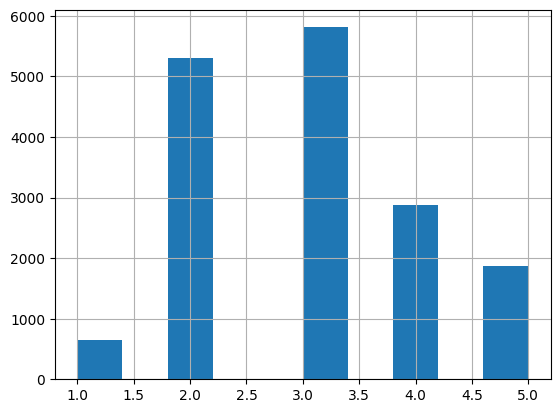

In [ ]:
new_train_set["income_category"].hist()

<Axes: >

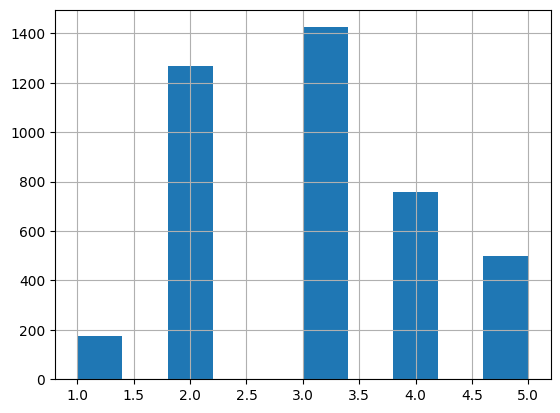

In [ ]:
new_test_set["income_category"].hist()

<code>income_category</code>의 비율이 **전체 데이터셋, 훈련셋, 테스트셋**에서 어떻게 변하는지 계산해본다.<br>
카테고리별 비율이 다름을 확인할 수 있다.

In [ ]:
df_new["income_category"].value_counts() / len(df_new)

,count
income_category,
3,0.350581
2,0.318847
4,0.176308
5,0.114438
1,0.039826


In [ ]:
new_train_set["income_category"].value_counts() / len(new_train_set)

,count
income_category,
3,0.351926
2,0.321705
4,0.174358
5,0.112827
1,0.039184


In [ ]:
new_test_set["income_category"].value_counts() / len(new_test_set)

,count
income_category,
3,0.345203
2,0.307413
4,0.184109
5,0.120882
1,0.042393


이제 분할하려는 기준 카테고리의 비율이 유지되면서 데이터셋을 분할하는 **계층적 샘플링**을 진행해본다.

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [ ]:
for train_idx, test_idx in sss.split(df_new, df_new["income_category"]):
    new2_train_set = df_new.loc[train_idx]
    new2_test_set = df_new.loc[test_idx]

이번에도 동일하게 <code>income_category</code>의 비율이 **전체 데이터셋, 훈련셋, 테스트셋**에서 어떻게 변하는지 확인해본다.<br>
무작위 샘플링의 경우와 달리, 각 카테고리별 샘플의 비율이 거의 동일함을 알 수 있다.

In [ ]:
df_new["income_category"].value_counts() / len(df_new)

,count
income_category,
3,0.350581
2,0.318847
4,0.176308
5,0.114438
1,0.039826


In [ ]:
new2_train_set["income_category"].value_counts() / len(new2_train_set)

,count
income_category,
3,0.350594
2,0.318859
4,0.176296
5,0.114462
1,0.039789


In [ ]:
new2_test_set["income_category"].value_counts() / len(new2_test_set)

,count
income_category,
3,0.350533
2,0.318798
4,0.176357
5,0.114341
1,0.039971


임의로 만든 <code>income_category</code>항목은 삭제하고, 계속 진행해본다.

In [ ]:
df.drop("income_category", axis= 1, inplace=True)

In [ ]:
new2_train_set.drop("income_category", axis=1, inplace=True)
new2_test_set.drop("income_category", axis=1, inplace=True)

## 단계 3. 데이터 시각화

데이터 분석 및 시각화가 이번 수업의 목표가 아니므로, 제공된 코드를 통해 시각화 되는 방식을 살펴보는 것으로 충분하다.

<Axes: xlabel='longitude', ylabel='latitude'>

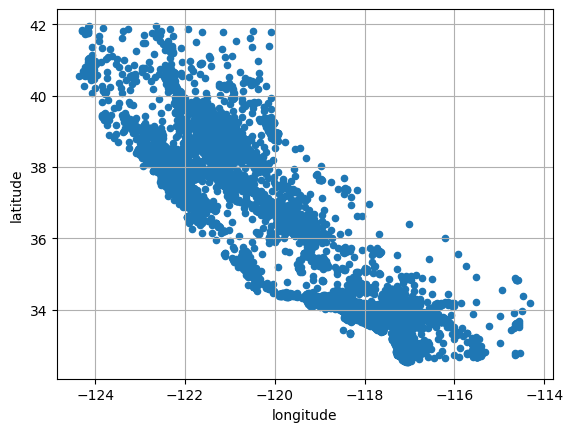

In [ ]:
df.plot(kind="scatter", x="longitude", y="latitude", grid=True)

<Axes: xlabel='longitude', ylabel='latitude'>

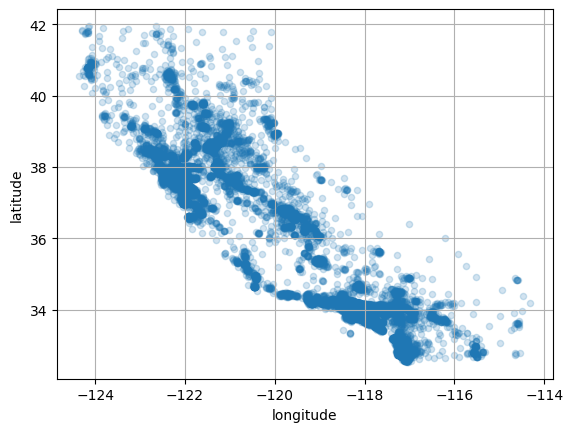

In [ ]:
df.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.2)

<Axes: xlabel='longitude', ylabel='latitude'>

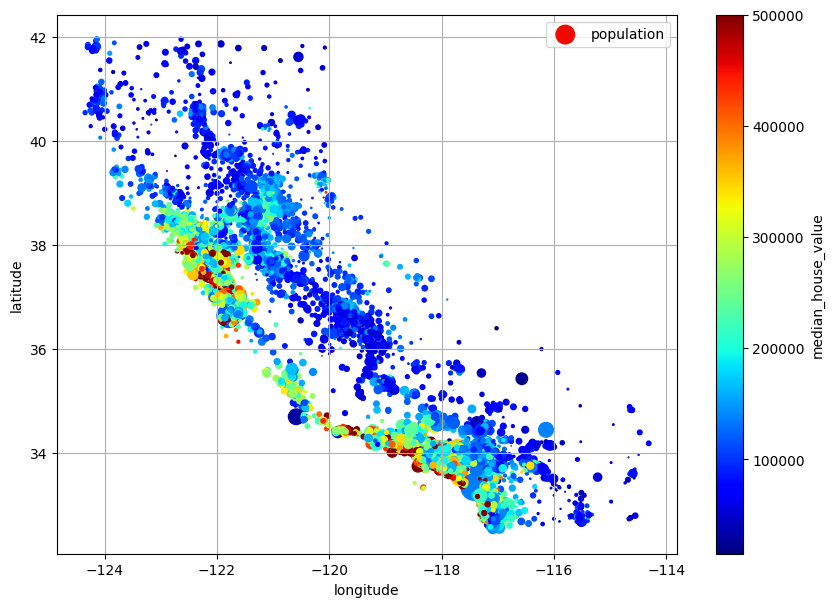

In [ ]:
df.plot(kind="scatter", x="longitude", y="latitude", grid=True,
             s=df["population"] / 100, label="population",
             c="median_house_value", cmap="jet", colorbar=True,
             legend=True, figsize=(10, 7))

## 단계 4. 상관관계 분석

데이터프레임의 <code>corr</code>함수를 사용하면, **특성 간의 관련성**을 알아볼 수 있다.<br>
이 때, 문자열 데이터는 상관관계 분석에서 제외해야하므로, <code>numeric_only=True</code> 옵션을 넣어준다.

In [ ]:
corr_df = df.corr(numeric_only=True)

In [ ]:
corr_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


상관계수(correlation coefficient)는 -1부터 1 사이의 범위를 갖고,

- 1에 가까우면 **강한 양의 상관관계**를 가지며
- -1에 가까우면 **강한 음의 상관관계**를 가진다고 말할 수 있다.

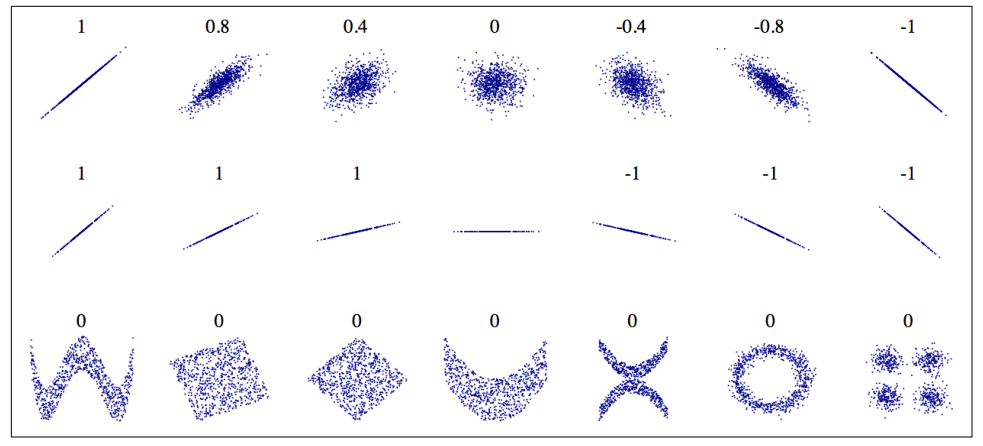

참고) 상관계수는 **선형적인 상관관계만 측정**할 수 있다는 한계를 이해한다.

여기에서 타겟변수로 예측하려하는 **median_house_value**와 다른 특성관의 상관관계를 확인해본다.

In [ ]:
corr_df["median_house_value"]

,median_house_value
longitude,-0.045967
latitude,-0.144160
housing_median_age,0.105623
total_rooms,0.134153
total_bedrooms,0.049686
population,-0.024650
households,0.065843
median_income,0.688075
median_house_value,1.000000


<code>sort_values()</code> 함수를 이용해서, 상관계수 값 크기대로 정렬해본다.

In [ ]:
corr_df["median_house_value"].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.688075
total_rooms,0.134153
housing_median_age,0.105623
households,0.065843
total_bedrooms,0.049686
population,-0.024650
longitude,-0.045967
latitude,-0.144160


상관계수를 숫자로만 볼 때에는 잘 파악될 수 없으므로, <code>scatter_matrix()</code>함수를 이용하여, 산점도(scatter plot)를 그려본다.

(당연히 자기 자신을 제외한 뒤) 상관계수가 가장 큰 속성인 median_income과의 산점도를 그려본다.

<Axes: xlabel='median_income', ylabel='median_house_value'>

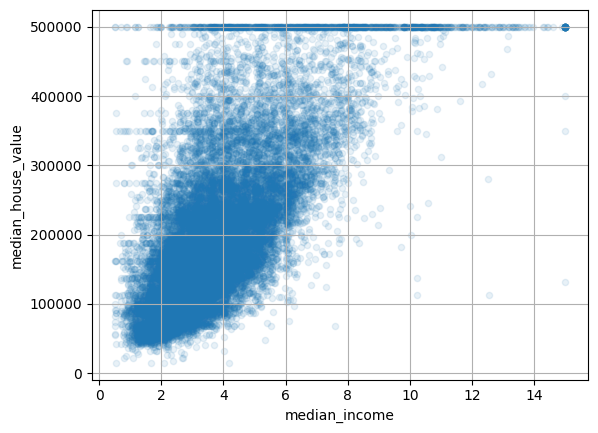

In [ ]:
df.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1, grid=True)

매우 강한 양의 상관관계가 있음을 확인해볼 수 있으며, 앞서 살펴본 가격 제한값이 수평선 형태로 표현됨을 볼 수 있다.

## 단계 5. 새로운 특성 조합해보기

In [ ]:
df["rooms_per_house"] = df["total_rooms"] / df["households"]
df["bedrooms_ratio"] = df["total_bedrooms"] / df["total_rooms"]
df["people_per_house"] = df["population"] / df["households"]

In [ ]:
corr_df = df.corr(numeric_only=True)

In [ ]:
corr_df["median_house_value"].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.688075
rooms_per_house,0.151948
total_rooms,0.134153
housing_median_age,0.105623
households,0.065843
total_bedrooms,0.049686
people_per_house,-0.023737
population,-0.024650
longitude,-0.045967


새로만든 특성들은 혼란을 피하기 위하여 삭제해준다.

In [ ]:
df.drop("rooms_per_house", axis= 1, inplace=True)
df.drop("bedrooms_ratio", axis= 1, inplace=True)
df.drop("people_per_house", axis= 1, inplace=True)

## 단계 6. 머신러닝 알고리즘 적용을 위한 데이터 전처리

In [ ]:
train_data = new2_train_set.drop("median_house_value", axis=1)
train_label = new2_train_set["median_house_value"].copy()

In [ ]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,NEAR BAY
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,<1H OCEAN
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,INLAND
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,INLAND
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...
14207,-118.40,33.86,41.0,2237.0,597.0,938.0,523.0,4.7105,<1H OCEAN
13105,-119.31,36.32,23.0,2945.0,592.0,1419.0,532.0,2.5733,INLAND
19301,-117.06,32.59,13.0,3920.0,775.0,2814.0,760.0,4.0616,NEAR OCEAN
19121,-118.40,34.06,37.0,3781.0,873.0,1725.0,838.0,4.1455,<1H OCEAN


In [ ]:
train_label

,median_house_value
13096,458300.0
14973,483800.0
3785,101700.0
14689,96100.0
20507,361800.0
...,...
14207,500001.0
13105,88800.0
19301,148800.0
19121,500001.0


### 단계 6-1. 데이터 정제

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 13096 to 19888
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16344 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [ ]:
train_data["total_bedrooms"].isnull().sum()

np.int64(168)

**정제되는 방식의 결과 비교**를 위하여, 훈련 데이터(train_data)에서 "total_bedrooms"가 빈값인 행들을 추출한다.

In [ ]:
null_rows_idx = train_data.isnull().any(axis=1)
train_data.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
14452,-120.67,40.50,15.0,5343.0,NaN,2503.0,902.0,3.5962,INLAND
18217,-117.96,34.03,35.0,2093.0,NaN,1755.0,403.0,3.4115,<1H OCEAN
11889,-118.05,34.04,33.0,1348.0,NaN,1098.0,257.0,4.2917,<1H OCEAN
20325,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,<1H OCEAN
14360,-117.87,33.62,8.0,1266.0,NaN,375.0,183.0,9.8020,<1H OCEAN


첫번째 가능한 전처리 방식은 결측치가 있는 데이터 행을 제거하는 것이다.

In [ ]:
df_opt1 = train_data.copy()

In [ ]:
df_opt1 = df_opt1.dropna(subset=["total_bedrooms"])

In [ ]:
df_opt1.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


두번째 가능한 전처리 방식은 결측치가 있는 컬럼을 제거하는 것이다.

In [ ]:
df_opt2 = train_data.copy()

In [ ]:
df_opt2 = df_opt2.drop("total_bedrooms", axis=1)

In [ ]:
df_opt2.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
14452,-120.67,40.50,15.0,5343.0,2503.0,902.0,3.5962,INLAND
18217,-117.96,34.03,35.0,2093.0,1755.0,403.0,3.4115,<1H OCEAN
11889,-118.05,34.04,33.0,1348.0,1098.0,257.0,4.2917,<1H OCEAN
20325,-118.88,34.17,15.0,4260.0,1701.0,669.0,5.1033,<1H OCEAN
14360,-117.87,33.62,8.0,1266.0,375.0,183.0,9.8020,<1H OCEAN


세번째 가능한 방식은 대표값 중 하나인 중간값으로 채워넣는 것이다.

In [ ]:
df_opt3 = train_data.copy()

In [ ]:
median = df_opt3["total_bedrooms"].median()

In [ ]:
df_opt3["total_bedrooms"].fillna(median, inplace=True)

/tmp/ipython-input-383473852.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_opt3["total_bedrooms"].fillna(median, inplace=True)


In [ ]:
df_opt3.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
14452,-120.67,40.50,15.0,5343.0,434.0,2503.0,902.0,3.5962,INLAND
18217,-117.96,34.03,35.0,2093.0,434.0,1755.0,403.0,3.4115,<1H OCEAN
11889,-118.05,34.04,33.0,1348.0,434.0,1098.0,257.0,4.2917,<1H OCEAN
20325,-118.88,34.17,15.0,4260.0,434.0,1701.0,669.0,5.1033,<1H OCEAN
14360,-117.87,33.62,8.0,1266.0,434.0,375.0,183.0,9.8020,<1H OCEAN


마지막 방식을 진행해주는 <code>SimpleImputer</code>를 이용할 수도 있다.

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

In [ ]:
housing_num = train_data.select_dtypes(include=[np.number])

In [ ]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [ ]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

수동으로 계산한 중간값 통계 비교

In [ ]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

훈련 데이터셋의 변환

In [ ]:
X = imputer.transform(housing_num)

In [ ]:
imputer.feature_names_in_

array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype=object)

In [ ]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

In [ ]:
housing_tr.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
14452,-120.67,40.50,15.0,5343.0,434.0,2503.0,902.0,3.5962
18217,-117.96,34.03,35.0,2093.0,434.0,1755.0,403.0,3.4115
11889,-118.05,34.04,33.0,1348.0,434.0,1098.0,257.0,4.2917
20325,-118.88,34.17,15.0,4260.0,434.0,1701.0,669.0,5.1033
14360,-117.87,33.62,8.0,1266.0,434.0,375.0,183.0,9.8020


In [ ]:
imputer.strategy

'median'

### 단계 6-2. 범주형 데이터 다루기

In [ ]:
df_cat = train_data[["ocean_proximity"]]
df_cat.head()

,ocean_proximity
13096,NEAR BAY
14973,<1H OCEAN
3785,INLAND
14689,INLAND
20507,NEAR OCEAN


범주형 특성을 순서형 변수로 치환하는 경우

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
ordinal_encoder = OrdinalEncoder()
df_cat_encoded = ordinal_encoder.fit_transform(df_cat)

In [ ]:
df_cat_encoded

array([[3.],
       [0.],
       [1.],
       ...,
       [4.],
       [0.],
       [4.]])

In [ ]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

원핫 인코딩 벡터로 치환하는 경우

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
cat_encoder = OneHotEncoder()

In [ ]:
df_cat_1hot = cat_encoder.fit_transform(df_cat)

In [ ]:
df_cat_1hot

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 16512 stored elements and shape (16512, 5)>

In [ ]:
df_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [ ]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

### 단계 6-3. 특성 스케일링

In [ ]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
housing_num_min_max_scaled = min_max_scaler.fit_transform(housing_num)

In [ ]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
housing_num_std_scaled = std_scaler.fit_transform(housing_num)

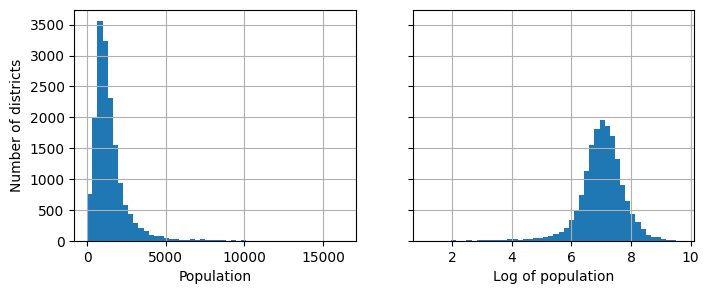

In [ ]:
from matplotlib import pyplot as plt
fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
train_data["population"].hist(ax=axs[0], bins=50)
train_data["population"].apply(np.log).hist(ax=axs[1], bins=50)
axs[0].set_xlabel("Population")
axs[1].set_xlabel("Log of population")
axs[0].set_ylabel("Number of districts")
plt.show()

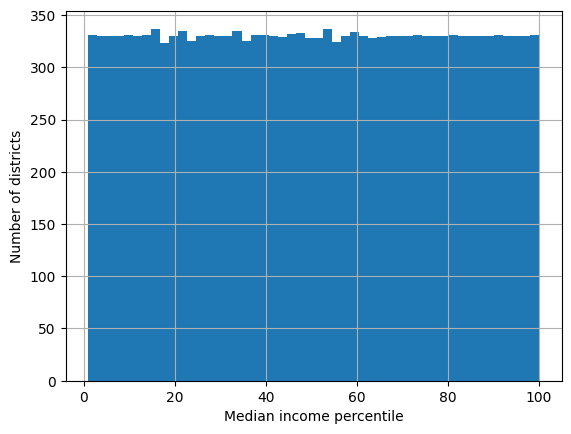

In [ ]:
percentiles = [np.percentile(train_data["median_income"], p)
               for p in range(1, 100)]
flattened_median_income = pd.cut(train_data["median_income"],
                                 bins=[-np.inf] + percentiles + [np.inf],
                                 labels=range(1, 100 + 1))
flattened_median_income.hist(bins=50)
plt.xlabel("Median income percentile")
plt.ylabel("Number of districts")
plt.show()

In [ ]:
from sklearn.metrics.pairwise import rbf_kernel

age_simil_35 = rbf_kernel(train_data[["housing_median_age"]], [[35]], gamma=0.1)

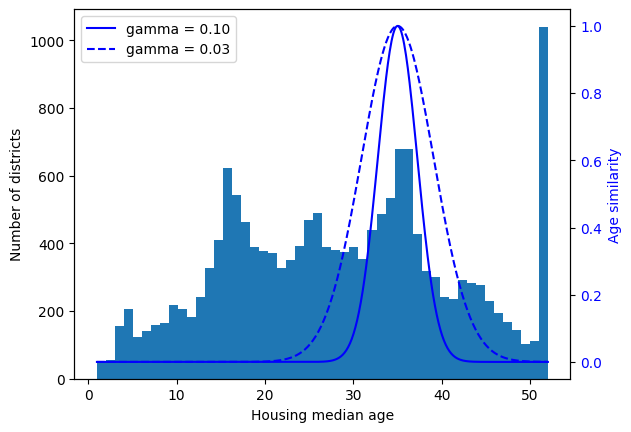

In [ ]:
ages = np.linspace(train_data["housing_median_age"].min(),
                   train_data["housing_median_age"].max(),
                   500).reshape(-1, 1)
gamma1 = 0.1
gamma2 = 0.03
rbf1 = rbf_kernel(ages, [[35]], gamma=gamma1)
rbf2 = rbf_kernel(ages, [[35]], gamma=gamma2)

fig, ax1 = plt.subplots()

ax1.set_xlabel("Housing median age")
ax1.set_ylabel("Number of districts")
ax1.hist(train_data["housing_median_age"], bins=50)

ax2 = ax1.twinx()  # x축을 공유 하는 쌍둥이 축을 만듭니다
color = "blue"
ax2.plot(ages, rbf1, color=color, label="gamma = 0.10")
ax2.plot(ages, rbf2, color=color, label="gamma = 0.03", linestyle="--")
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylabel("Age similarity", color=color)

plt.legend(loc="upper left")
plt.show()

### 단계 6-4. 전처리 방식의 연결, 파이프라인

In [ ]:
from sklearn.pipeline import make_pipeline

num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())

In [ ]:
from sklearn import set_config

set_config(display='diagram')

num_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [ ]:
housing_num_prepared = num_pipeline.fit_transform(housing_num)
housing_num_prepared[:2].round(2)

array([[-1.42,  1.01,  1.86,  0.31,  1.37,  0.14,  1.39, -0.94],
       [ 0.6 , -0.7 ,  0.91, -0.31, -0.44, -0.69, -0.37,  1.17]])

In [ ]:
df_housing_num_prepared = pd.DataFrame(
    housing_num_prepared, columns=num_pipeline.get_feature_names_out(),
    index=housing_num.index)

In [ ]:
df_housing_num_prepared.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13096,-1.423037,1.013606,1.861119,0.311912,1.368167,0.137460,1.394812,-0.936491
14973,0.596394,-0.702103,0.907630,-0.308620,-0.435925,-0.693771,-0.373485,1.171942


In [ ]:
num_pipeline.steps

[('simpleimputer', SimpleImputer(strategy='median')),
 ('standardscaler', StandardScaler())]

이번에는 범주형 컬럼의 변환을 포함하는 파이프라인을 살펴본다.

In [ ]:
from sklearn.compose import ColumnTransformer

num_attribs = ["longitude", "latitude", "housing_median_age", "total_rooms",
               "total_bedrooms", "population", "households", "median_income"]
cat_attribs = ["ocean_proximity"]

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
])

In [ ]:
from sklearn.compose import make_column_selector, make_column_transformer

num_attribs = ["longitude", "latitude", "housing_median_age", "total_rooms",
               "total_bedrooms", "population", "households", "median_income"]
cat_attribs = ["ocean_proximity"]

preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object)),
)

In [ ]:
housing_prepared = preprocessing.fit_transform(train_data)

In [ ]:
housing_prepared_fr = pd.DataFrame(
    housing_prepared,
    columns=preprocessing.get_feature_names_out(),
    index=train_data.index)
housing_prepared_fr.head(2)

,pipeline-1__longitude,pipeline-1__latitude,pipeline-1__housing_median_age,pipeline-1__total_rooms,pipeline-1__total_bedrooms,pipeline-1__population,pipeline-1__households,pipeline-1__median_income,pipeline-2__ocean_proximity_<1H OCEAN,pipeline-2__ocean_proximity_INLAND,pipeline-2__ocean_proximity_ISLAND,pipeline-2__ocean_proximity_NEAR BAY,pipeline-2__ocean_proximity_NEAR OCEAN
13096,-1.423037,1.013606,1.861119,0.311912,1.368167,0.137460,1.394812,-0.936491,0.0,0.0,0.0,1.0,0.0
14973,0.596394,-0.702103,0.907630,-0.308620,-0.435925,-0.693771,-0.373485,1.171942,1.0,0.0,0.0,0.0,0.0


## 단계 7. 모델 선택과 훈련

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = make_pipeline(preprocessing, LinearRegression())

In [ ]:
lin_reg.fit(train_data, train_label)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f4f695204a0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f4f6bd0d4f0>)])),
                ('linearregression', LinearRegression())])

In [ ]:
housing_predictions = lin_reg.predict(train_data)
housing_predictions[:5].round(-2)

array([270900., 334800., 119900., 109200., 305600.])

실제값과 비교한다.

In [ ]:
train_label.iloc[:5].values

array([458300., 483800., 101700.,  96100., 361800.])

In [ ]:
error_ratios = housing_predictions[:5].round(-2) / train_label.iloc[:5].values - 1
print(", ".join([f"{100 * ratio:.1f}%" for ratio in error_ratios]))

-40.9%, -30.8%, 17.9%, 13.6%, -15.5%


In [ ]:
from sklearn.metrics import mean_squared_error

lin_mse = mean_squared_error(train_label, housing_predictions)
lin_mse

4655719792.776588

In [ ]:
lin_rmse = np.sqrt(lin_mse)
lin_rmse

np.float64(68232.83515124217)

다른 모델(DicisionTree regressor) 성능 비교

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
tree_reg.fit(train_data, train_label)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f4f695204a0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f4f6bd0d4f0>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [ ]:
housing_predictions = tree_reg.predict(train_data)
tree_mse = mean_squared_error(train_label, housing_predictions,)
tree_rmse = np.sqrt(tree_mse)

In [ ]:
tree_rmse

np.float64(0.0)

## 단계 8. 교차검증 평가

In [ ]:
from sklearn.model_selection import cross_val_score

tree_rmses = -cross_val_score(tree_reg, train_data, train_label,
                              scoring="neg_root_mean_squared_error", cv=10)

In [ ]:
pd.Series(tree_rmses).describe()

,0
count,10.000000
mean,68778.541172
std,1606.882060
min,66941.100114
25%,67347.392808
50%,68653.791710
75%,69967.922873
max,71446.436634
